# Team Picks

Dan Szyc

-------

### Motivation

Regardless of the sport, activity, or event, we often prefer to have fair teams. Suppose two team captains are chosen at random from a pool of players. In hopes of creating the best team, they take turns choosing the best player available. Team 1's captain gets first pick, then Team 2's captain picks the second best player, and the process repeats. But is this the method fair to Team 2? Suppose Team 2's captain is allowed to pick *two* players, the second and third-best players, then Team 1 picks one, and Team 2 picks one, and so on. Which method results in the fairest teams?


In [1]:
team_size = 3
num_trials = 1000000

import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Below are two operations that need not be changed as `team-size` is manipulated. The only situation in which they should be modified is to compare choosing patterns for more than two teams.

In [2]:
def choose_caps():
    """ picks two captains at random from a list of players

    Returns:
        t1 (list): list containing the team1 captain
        t2 (list): list containing the team2 captain
        players (list): remaining players
    """
    # create a list of players ranked by skill 
    players = list(range(0,2 * team_size))
    
    # choose captains at random and remove them from the player pool
    t1_cap = random.choice(players)
    t1 = [t1_cap]
    players.remove(t1_cap)
    t2_cap = random.choice(players)
    t2 = [t2_cap]
    players.remove(t2_cap)
    
    return players, t1, t2

In [3]:
def skill_diff(t1,t2):
    """ calculates the positive skill difference between two teams

    Args:
        t1 (list): team1
        t2 (list): team2
    Returns:
        sk_df (float): positive skill difference between the teams 
    """
    t1_skill = sum(t1) / len(t1)
    t2_skill = sum(t2) / len(t2)
    sk_df = round(abs(t1_skill-t2_skill),2)
    
    return sk_df

#### This section defines the order in which team captains choose their players. More complex choosing patterns are needed to choose fair teams as `team-size` increases. For the purpose of this simple example, these two patterns suffice.

In [4]:
def pick1_pick1(players):
    """ forms teams such that each team takes turns picking the highest rated player

    Args:
        players (list): list of players to choose from
    Returns:
        t1 (list): list containing team1
        t2 (list): list containing team2
    """
    # 
    for i in range(team_size-1):
        t1.append(max(players))
        players.remove(max(players))
        t2.append(max(players))
        players.remove(max(players))
    return t1, t2

In [5]:
def pick1_pick2(players):
    """ forms teams such that team1 picks one, team2 pickes two, then they continue picking one each

    Args:
        players (list): players to choose from
    Returns:
        t1 (list): team1
        t2 (list): team2
    """
    #team1 picks one
    t1.append(max(players))
    players.remove(max(players))
    
    #team2 picks two
    for i in range(2):
        t2.append(max(players))
        players.remove(max(players))
        
    #teams take turns picking one each (pick1_pick1)
    for i in range(team_size-3):
        t1.append(max(players))
        players.remove(max(players))
        t2.append(max(players))
        players.remove(max(players))
    
    #team1 gets the leftover player
    t1.append(min(players))
    return t1, t2

### Putting it all together

In [6]:
# repeat the pick1pick1 method num_trails times, storing the skill difference result of each trial
skill_diff_p1p1 = []
for i in range(num_trials):
    players, t1, t2 = choose_caps()
    t1, t2 = pick1_pick1(players)
    skill_diff_p1p1.append(skill_diff(t1,t2))
    
# repeat the pick1pick2 method num_trails times, storing the skill difference result of each trial
skill_diff_p1p2 = []
for i in range(num_trials):
    players, t1, t2 = choose_caps()
    t1, t2 = pick1_pick2(players)  
    skill_diff_p1p2.append(skill_diff(t1,t2))
    
# display the average skill difference of each pattern
avg_skdiff_p1p1 = round(sum(skill_diff_p1p1) / len(skill_diff_p1p1),4)
avg_skdiff_p1p2 = round(sum(skill_diff_p1p2) / len(skill_diff_p1p2),4)
print('p1p1_avg_skill_diff',avg_skdiff_p1p1)
print('p1p2_avg_skill_diff',avg_skdiff_p1p2)

p1p1_avg_skill_diff 1.0884
p1p2_avg_skill_diff 0.8216


### Visualization

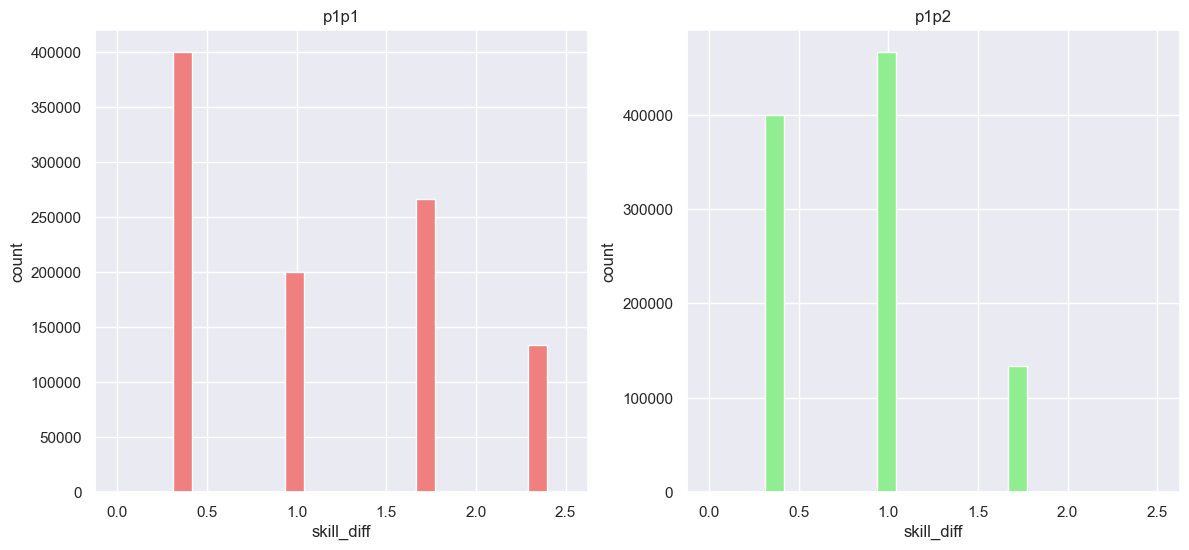

In [8]:
# determine size of histogram bins
bins = np.linspace(0, 2.5, 25) 

# plot histograms for comparison
plt.subplot(1, 2, 1)
plt.hist(skill_diff_p1p1,bins=bins,color='lightcoral')
plt.gca().title.set_text('p1p1')
plt.xlabel('skill_diff')
plt.ylabel('count')

plt.subplot(1, 2, 2)
plt.hist(skill_diff_p1p2,bins=bins, color='lightgreen')
plt.gca().title.set_text('p1p2') 
plt.xlabel('skill_diff')
plt.ylabel('count')

# aesthetics
sns.set()
plt.gcf().set_size_inches(14, 6)
plt.subplots_adjust(wspace=.2, hspace=.1)

-----

### Assumptions

- Captains are assumed to always pick the player with the highest skill.
    - A captain might choose their friend instead of the best player.
- It is assumed that there are consistent gaps between the skill of players. 
    - The best player in the pool can be 10x better than the rest, meaning one team will outskill the other regardless of the choosing pattern.
- There must be exactly two teams.
    - Modifications must be made to support more.
- There must be an equal number of people per team.
    - Uneven teams are not accounted for.
- The method of choosing captains is truly random.
    - [No computer can make a truly random choice](https://slate.com/technology/2022/06/bridle-ways-of-being-excerpt-computer-randomness.html#:~:text=To%20repeat%2C%20computers%20are%20incapable,mathematical%20operation%20is%20truly%20random.).

# Conclusion

Although our assumptions are never perfectly met, the standard practice of picking 121212 is clearly not the optimal strategy. This example demonstrates that following a 122121 pattern is the fairest way to choose two teams of three players. For more reading on this topic, I recommend [this article](https://datagenetics.com/blog/may22021/index.html).